In [1]:
from typing import List, Tuple

import pathlib

import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from matplotlib.animation import FuncAnimation, PillowWriter

sns.set(style='white')

In [2]:
df = pd.read_csv('extra_features.csv', index_col=0)

lat_lons = pd.read_csv('climateChallengeData/grid2latlon.csv')
df.loc[df.elevation_mean < 0, 'elevation_mean'] = 0  # remove negative values (sea or empty) artifacts from qgis
df = df.merge(lat_lons, left_index=True, right_index=True)  # adds grid indeces and LAT LON

df.head()

field_1             X             Y  green_cove  green_co_1  green_co_2  \
0        0  3.655359e+06  2.070910e+06        5297      726516  137.156126   
1        1  3.655450e+06  2.070801e+06        5945      849799  142.943482   
2        2  3.655459e+06  2.070900e+06        3737      511437  136.857640   
3        3  3.655456e+06  2.069699e+06        6501      922808  141.948623   
4        4  3.655464e+06  2.069798e+06        8129     1162246  142.975274   

   green_co_3  landuse_majority  elevation_mean  elevation_range  \
0       141.0             312.0      199.254802        59.430008   
1       147.0             311.0      199.392714        62.229996   
2       139.0             312.0      221.252228        52.389999   
3       144.0             311.0      409.811718        63.619995   
4       146.0             311.0      384.606403        53.549988   

   elevation_majority  slope_mean  orientation_mean   nx   ny        LAT  \
0          190.740005   20.960422        224.190428  186  227  41.424183   
1          194.850006   22.828920        145.431366  187  226  41.423294   
2          221.179993   20.978525        245.407737  187  227  41.424194   
3          387.880005   23.704270        198.288128  188  215  41.413395   
4          376.790009   21.304633         77.051443  188  216  41.414295   

        LON  
0  2.052902  
1  2.054112  
2  2.054099  
3  2.055452  
4  2.055439

In [236]:
sea_dist = pd.read_csv('sea_distance.csv')
df = df.join(sea_dist[['field_1', 'sea_proximity_1']], on='field_1', rsuffix='_joined')

In [237]:
df

field_1             X             Y  green_cove  green_co_1  \
0            0  3.655359e+06  2.070910e+06        5297      726516   
1            1  3.655450e+06  2.070801e+06        5945      849799   
2            2  3.655459e+06  2.070900e+06        3737      511437   
3            3  3.655456e+06  2.069699e+06        6501      922808   
4            4  3.655464e+06  2.069798e+06        8129     1162246   
...        ...           ...           ...         ...         ...   
10208    10208  3.669693e+06  2.067752e+06        2506      229310   
10209    10209  3.669701e+06  2.067852e+06        8043      760557   
10210    10210  3.669784e+06  2.067644e+06        1456      128801   
10211    10211  3.669793e+06  2.067744e+06        2803      249721   
10212    10212  3.669892e+06  2.067734e+06           0           0   

       green_co_2  green_co_3  landuse_majority  elevation_mean  \
0      137.156126       141.0             312.0      199.254802   
1      142.943482       147.0             311.0      199.392714   
2      136.857640       139.0             312.0      221.252228   
3      141.948623       144.0             311.0      409.811718   
4      142.975274       146.0             311.0      384.606403   
...           ...         ...               ...             ...   
10208   91.504389        90.0               NaN        0.000000   
10209   94.561358        91.0             121.0        0.000000   
10210   88.462225        87.0               NaN        0.000000   
10211   89.090617        89.0               NaN        0.000000   
10212         NaN         NaN               NaN        0.000000   

       elevation_range  elevation_majority  slope_mean  orientation_mean   nx  \
0            59.430008          190.740005   20.960422        224.190428  186   
1            62.229996          194.850006   22.828920        145.431366  187   
2            52.389999          221.179993   20.978525        245.407737  187   
3            63.619995          387.880005   23.704270        198.288128  188   
4            53.549988          376.790009   21.304633         77.051443  188   
...                ...                 ...         ...               ...  ...   
10208      8893.290000        -8888.000000   17.938236        118.961259  331   
10209      8903.690000        -8888.000000   11.834831        142.218763  331   
10210      8888.000000        -8888.000000    8.104355         85.785157  332   
10211      8887.310000        -8888.000000   23.012996        140.357063  332   
10212      8888.760000        -8888.000000   14.351437        175.894743  333   

        ny        LAT       LON  field_1_joined  sea_proximity_1  
0      227  41.424183  2.052902               0     11842.049805  
1      226  41.423294  2.054112               1     11706.541992  
2      227  41.424194  2.054099               2     11754.238281  
3      215  41.413395  2.055452               3     10910.698242  
4      216  41.414295  2.055439               4     10979.814453  
...    ...        ...       ...             ...              ...  
10208  209  41.409267  2.226604           10208         7.071068  
10209  210  41.410170  2.226594           10209        38.078865  
10210  208  41.408375  2.227811           10210         0.000000  
10211  209  41.409280  2.227801           10211        25.000000  
10212  209  41.409286  2.228997           10212         0.000000  

[10213 rows x 19 columns]

In [3]:
stations_pred = pd.read_csv('submission/results_task_2/prediction_best_stations.csv')
stations = pd.read_csv('climateChallengeData/officialStations.csv')

In [4]:
stations_pred.drop_duplicates(subset='est', inplace=True)

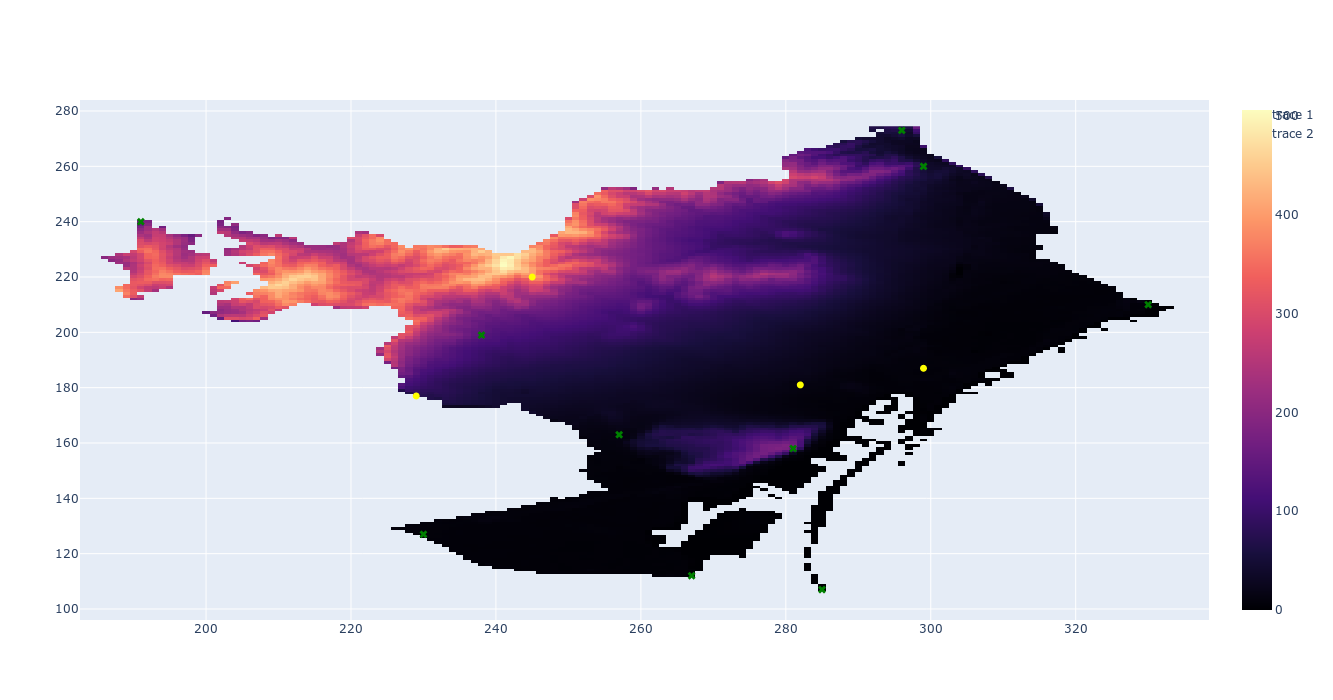

In [5]:
heatmap = go.Heatmap(x=df.nx, y=df.ny, z=df.elevation_mean, colorscale='magma')

scatter_pred_stations = go.Scatter(x=stations_pred['nx'], y=stations_pred['ny'], mode='markers', marker_size=7,
                                   marker_color='green', marker_symbol='x', hovertext=stations_pred['est'])
scatter_stations = go.Scatter(x=stations['nx'], y=stations['ny'], mode='markers', marker_size=7, marker_color='yellow')

fig = go.Figure(data=[heatmap, scatter_pred_stations, scatter_stations])
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

### Elevation 3D (useless)

In [6]:
# elev_grid = df.pivot(values='elevation_mean', columns='nx', index='ny')
# fig = go.Figure(data=[go.Surface(z=elev_grid.values)])

# fig.update_layout(scene_aspectmode='manual',
#                   scene_aspectratio=dict(x=10, y=10, z=1),  paper_bgcolor='rgba(0,0,0,0)',
#                   plot_bgcolor='rgba(0,0,0,0)')
# fig.show()

## Dades reals (model) 

In [7]:
real_files = pathlib.Path('climateChallengeData/real_full/').glob('real*')
real_dfs = [pd.read_csv(file) for file in real_files]

Get mean of all grid for each day

In [8]:
real_df = pd.concat(real_dfs)
real_df['day'] = pd.to_datetime(real_df['day'],  format='%d/%m/%Y')
real_per_day = real_df.set_index('day')
real_per_day = real_per_day.groupby(real_per_day.index).agg({'T_MEAN': 'mean'})

In [9]:
real_per_day.head()

T_MEAN
day                  
2012-01-01  12.776434
2012-01-02  11.086920
2012-01-03   9.841248
2012-01-04  10.158637
2012-01-05  10.799545

In [10]:
real_per_day = real_per_day.reset_index()
real_per_day['dayofyear'] = real_per_day.day.dt.dayofyear
real_per_day['year'] = real_per_day.day.dt.year

### Mitjana per dia de l'any

In [11]:
dayofyear_mean = real_per_day.groupby(by='dayofyear')['T_MEAN'].mean()

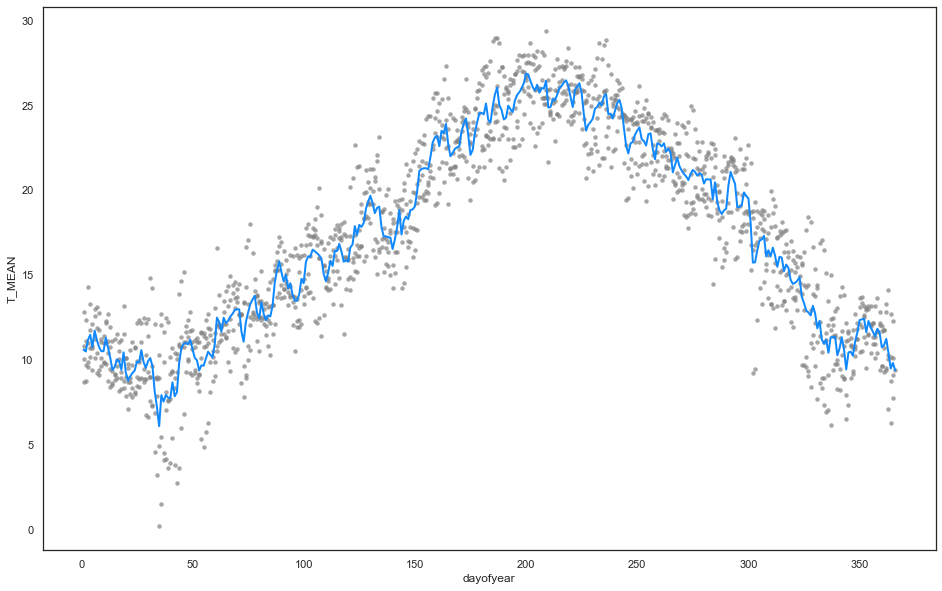

In [12]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='dayofyear',  y='T_MEAN', data=real_per_day, palette='viridis', s=20, color='gray', linewidth=0, alpha=0.7)
plt.plot(dayofyear_mean, lw=2, color='#1089ff')

In [13]:
day_by_year_df = real_per_day.pivot_table(index=real_per_day.dayofyear, columns=real_per_day.year, values='T_MEAN', aggfunc='mean')

### Long to wide real data

In [14]:
def long_to_wide(dfs: List[pd.DataFrame]) -> Tuple[np.ndarray, np.ndarray]:
    """ From long forma (rows with x, y, and value) to wide matrix of values with x as cols
    and y as rows for each day
    """
    t_mean_arrays = []
    t_max_arrays = []
    t_min_arrays = []
    dates = []
    for df in dfs:  # iter over year data
        df['day'] = pd.to_datetime(df['day'],  format='%d/%m/%Y')
        grouped = df.groupby(pd.Grouper(key='day', freq='D'))
        for date, group in grouped:
            dates.append(date)
            
            t_mean_grid = group.pivot(values='T_MEAN', index='ny', columns='nx')
            t_mean_arrays.append(t_mean_grid)
            
            t_max_grid = group.pivot(values='T_MAX', index='ny', columns='nx')
            t_max_arrays.append(t_max_grid)
            
            t_min_grid = group.pivot(values='T_MIN', index='ny', columns='nx')
            t_min_arrays.append(t_min_grid)
    
    t_mean_arrays =  np.asarray([arr.values for arr in t_mean_arrays])
    t_max_arrays =  np.asarray([arr.values for arr in t_max_arrays])
    t_min_arrays =  np.asarray([arr.values for arr in t_min_arrays])
    
    dates = np.asarray(dates)
    
    return dates, t_mean_arrays, t_max_arrays, t_min_arrays

In [15]:
dates, t_mean_arrays, t_max_arrays, t_min_arrays = long_to_wide(real_dfs)

### Estam mesurant bé?

Mitjana dels anys de les dades reals. Mitjana per estació dels mateixos anys que les dades reals. Fer histograma i mostrar on caurien els punts de les estacions oficials

In [261]:
stations_xls = pd.ExcelFile('climateChallengeData/data_S2_S3_S4.xlsx')
stations_dfs = [stations_xls.parse(sheet) for sheet in stations_xls.sheet_names]
stations_df = pd.concat(stations_dfs, sort=True)
stations_df['DATA'] = pd.to_datetime(stations_df['DATA'], format="%Y-%m-%d")

In [265]:
stations_df.loc[stations_df.ESTACIO == 'Badalona - Museu'].Tm

0       19.8
1       21.3
2       21.9
3       21.0
4       19.7
        ... 
4844    10.5
4845     9.0
4846     8.0
4847     9.1
4848    11.9
Name: Tm, Length: 4849, dtype: float64

In [17]:
stations

S                         Station   Latitude  Longitude   nx   ny
0  S1   Barcelona - Observatori Fabra  41.418438   2.123586  245  220
1  S2                 Barcelona - Zoo  41.389430   2.188470  299  187
2  S3            Barcelona - el Raval  41.383900   2.167750  282  181
3  S4  Barcelona - Zona Universitària  41.379190   2.105400  229  177

In [18]:
official = stations_df.loc[stations_df.ESTACIO.isin(stations.Station)].set_index(['DATA', 'ESTACIO'])

In [19]:
official = official.sort_index().loc[real_per_day.day.min().to_datetime64():real_per_day.day.max().to_datetime64()]

In [20]:
official.reset_index(inplace=True)

In [258]:
official['ESTACIO'] = official['ESTACIO'].str.replace('Barcelona -', '')

In [260]:
official.ESTACIO.unique()

array([' Zona Universitària', ' Zoo', ' el Raval'], dtype=object)

In [88]:
real_mean_flat = real_df.pivot_table(values='T_MEAN', columns='nx', index='ny', aggfunc='mean').unstack().reset_index()
real_mean_flat.columns = ['nx', 'ny', 'T']

In [118]:
real_mean_flat = real_mean_flat.sort_values('T').reset_index()

In [121]:
off_means = official.groupby('ESTACIO')['Tm'].mean().to_frame().reset_index()

In [122]:
off_means = off_means.merge(stations[['Station', 'nx', 'ny']], left_on='ESTACIO', right_on='Station')

In [143]:
off_means['ESTACIO'] = off_means['ESTACIO'].str.replace('Barcelona -', '')

In [144]:
off_means

ESTACIO         Tm                         Station   nx   ny
0   Zona Universitària  16.561533  Barcelona - Zona Universitària  229  177
1                  Zoo  17.006776                 Barcelona - Zoo  299  187
2             el Raval  17.940452            Barcelona - el Raval  282  181

In [145]:
zona_univ_idx = real_mean_flat.loc[np.logical_and(real_mean_flat.nx == 229, real_mean_flat.ny == 177)].index[0]
zoo_idx = real_mean_flat.loc[np.logical_and(real_mean_flat.nx == 299, real_mean_flat.ny == 187)].index[0]
raval_idx = real_mean_flat.loc[np.logical_and(real_mean_flat.nx == 282, real_mean_flat.ny == 181)].index[0]

In [160]:
off_idx = [zona_univ_idx, zoo_idx, raval_idx]
off_idx

[3233, 4602, 8897]

In [164]:
diffs = real_mean_flat.iloc[off_idx]['T'].values - off_means.Tm.values

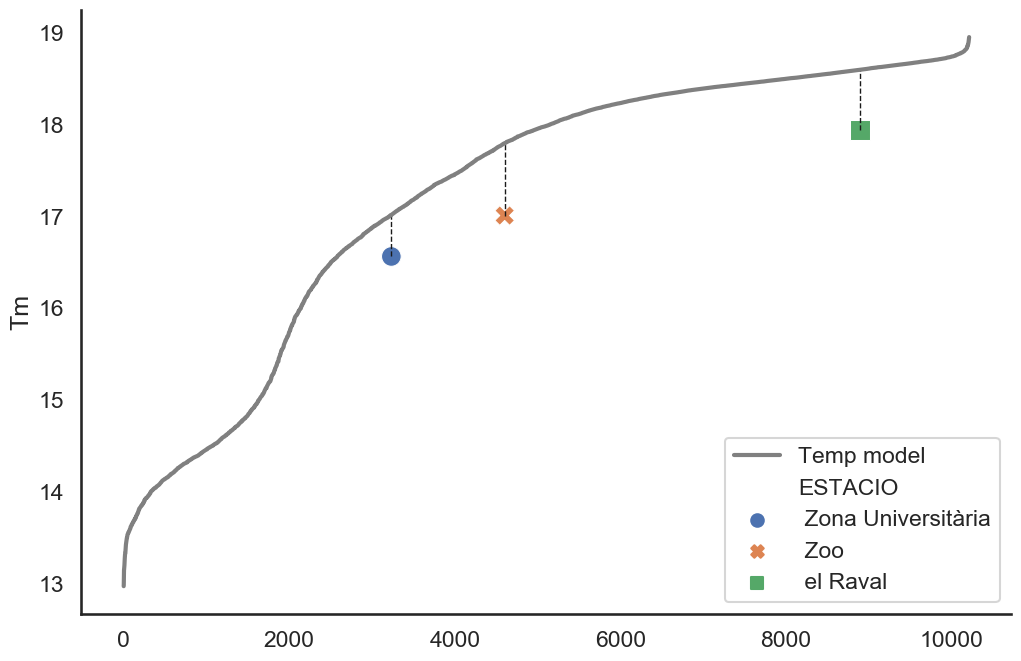

In [186]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(real_mean_flat['T'].values, c='gray', label='Temp model', lw=3)
sns.scatterplot(off_idx, off_means.Tm, hue=off_means.ESTACIO,style=off_means.ESTACIO, s=200)
plt.vlines(off_idx, ymin=off_means.Tm, ymax=off_means.Tm+diffs, linestyles='--', lw=1)
sns.despine()
plt.legend(loc='lower right')

### Compare histograms

zona universitaria

In [21]:
stations

S                         Station   Latitude  Longitude   nx   ny
0  S1   Barcelona - Observatori Fabra  41.418438   2.123586  245  220
1  S2                 Barcelona - Zoo  41.389430   2.188470  299  187
2  S3            Barcelona - el Raval  41.383900   2.167750  282  181
3  S4  Barcelona - Zona Universitària  41.379190   2.105400  229  177

In [22]:
sns.set(style='white',rc={'figure.figsize':(9,6)}, context='talk')

Text(0.5, 1.0, 'Zona universitaria')

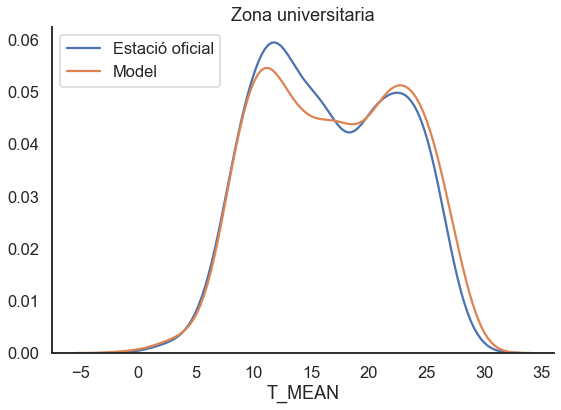

In [23]:
zona_univ = official.loc[official.ESTACIO == 'Barcelona - Zona Universitària'].set_index('DATA').Tm

coords_zona_univ = (229, 177)

real_zona_univ = real_df.loc[np.logical_and(real_df.nx == coords_zona_univ[0], real_df.ny == coords_zona_univ[1])].set_index('day')['T_MEAN']

assert all(real_zona_univ.index == zona_univ.index)

sns.distplot(zona_univ, hist=False, label='Estació oficial')
sns.distplot(real_zona_univ, hist=False, label='Model')
sns.despine()
plt.title('Zona universitaria')

Zoo

Text(0.5, 1.0, 'Zoo')

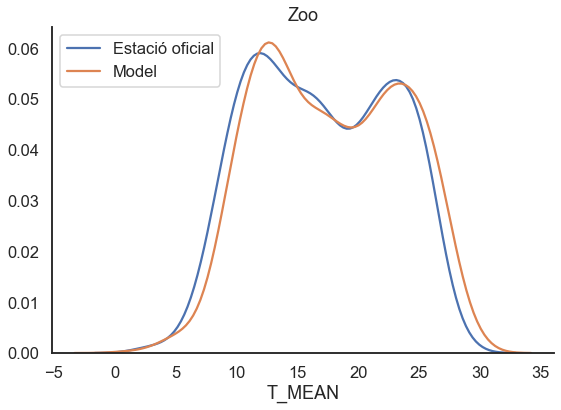

In [24]:
zoo = official.loc[official.ESTACIO == 'Barcelona - Zoo'].set_index('DATA').Tm
coords = (299, 187)
real_zoo = real_df.loc[np.logical_and(real_df.nx == coords[0], real_df.ny == coords[1])].set_index('day')['T_MEAN']
sns.distplot(zoo, hist=False, label='Estació oficial')
sns.distplot(real_zoo, hist=False, label='Model')
sns.despine()
plt.title('Zoo')

Raval

Text(0.5, 1.0, 'Raval')

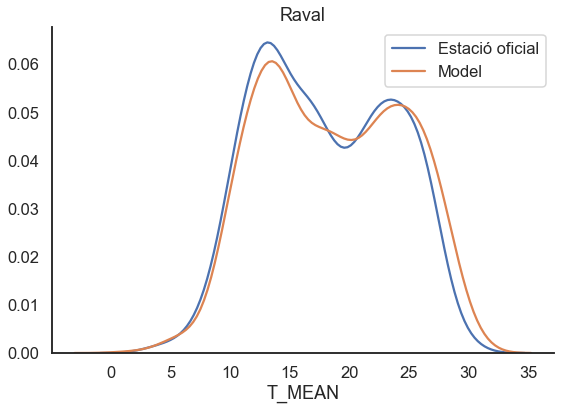

In [25]:
raval = official.loc[official.ESTACIO == 'Barcelona - el Raval'].set_index('DATA').Tm
coords = (282, 181)
real_raval = real_df.loc[np.logical_and(real_df.nx == coords[0], real_df.ny == coords[1])].set_index('day')['T_MEAN']
sns.distplot(raval, hist=False, label='Estació oficial')
sns.distplot(real_raval, hist=False, label='Model')
sns.despine()
plt.title('Raval')

###  Animate temp

### Plotly stuff

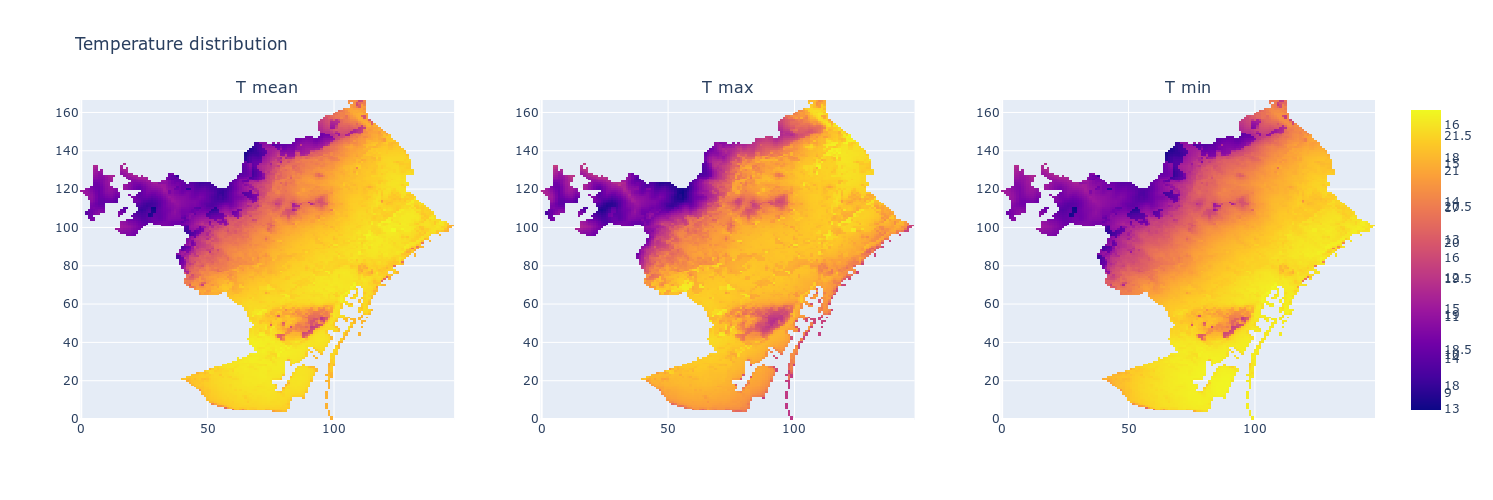

In [26]:
from plotly.subplots import make_subplots

temp_mean = t_mean_arrays.mean(axis=0)
temp_max = t_max_arrays.mean(axis=0)
temp_min = t_min_arrays.mean(axis=0)

abs_min = np.nanmin(temp_min)
abs_max = np.nanmax(temp_max)

heatmap1 = go.Heatmap(z=temp_mean, colorbar=None)
heatmap2 = go.Heatmap(z=temp_max, colorbar=None)
heatmap3 = go.Heatmap(z=temp_min, colorbar=None)

fig = make_subplots(rows=1, cols=3, subplot_titles=('T mean', 'T max', 'T min'))

fig.add_trace(heatmap1, row=1, col=1)
fig.add_trace(heatmap2, row=1, col=2)
fig.add_trace(heatmap3, row=1, col=3)

fig.update_layout(title_text="Temperature distribution", height=500, width=1300)

fig.show()

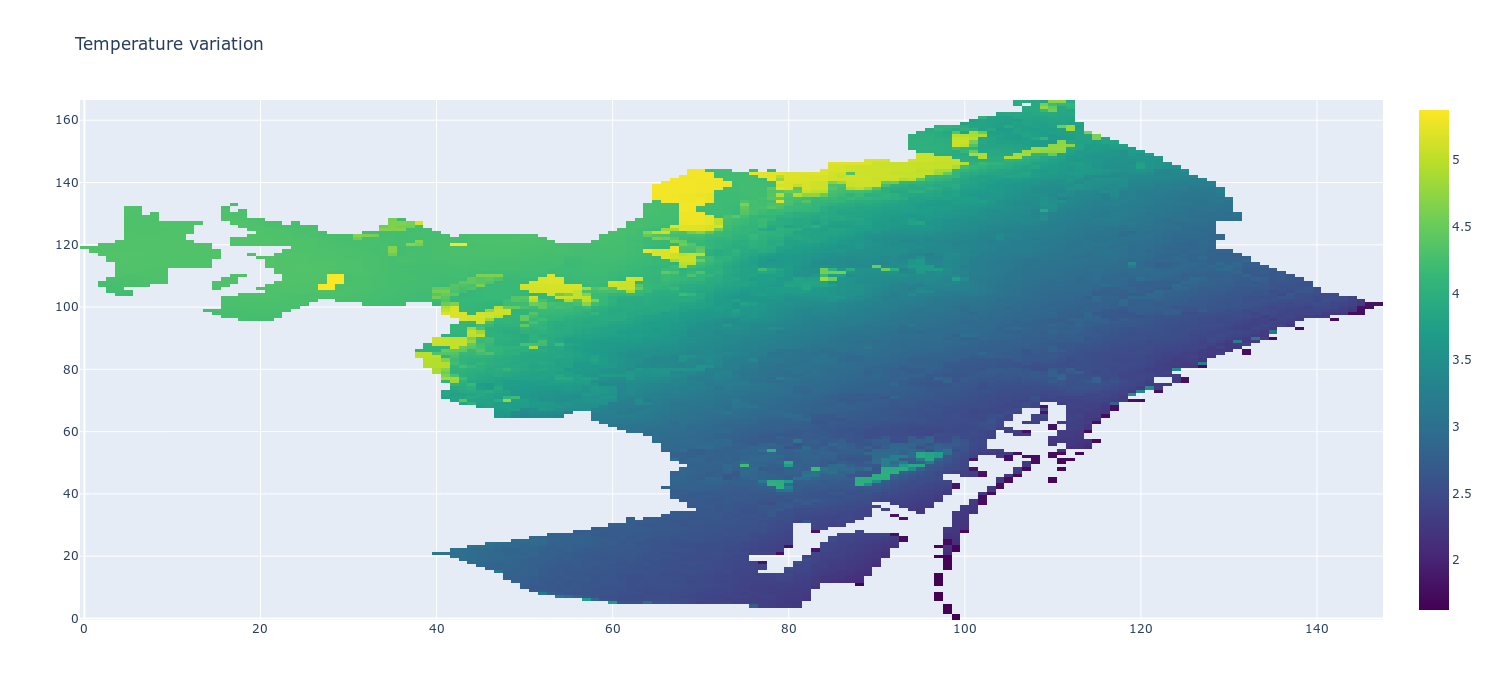

In [27]:
t_var_arrays = t_max_arrays - t_mean_arrays
t_var_mean = t_var_arrays.mean(axis=0)

heatmap4 = go.Heatmap(z=t_var_mean, colorscale='Viridis', colorbar=None)
fig = go.Figure()
fig.add_trace(heatmap4)
fig.update_layout(title_text="Temperature variation", height=700, width=700)

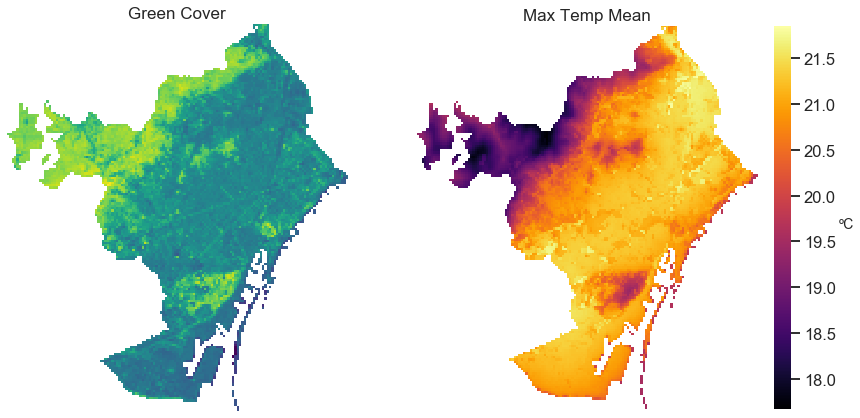

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

green_cover = df.pivot_table(values='green_co_2', columns='nx', index='ny')

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(15,10), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]})

fig.subplots_adjust(wspace=0.3)

im  = ax.imshow(green_cover.iloc[::-1].values, cmap='viridis')
im2 = ax2.imshow(temp_max[::-1], cmap='inferno')

title_size = 17
ax.set_title('Green Cover', size=title_size)
ax2.set_title('Max Temp Mean', size=title_size)

ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)


cbar = fig.colorbar(im2, cax=cax, ax=[ax2])
cbar.outline.set_visible(False)
cbar.set_label('ºC', rotation=0, size=14, labelpad=10, y=0.5)

ax.axis('off')
ax2.axis('off')

plt.savefig('green_co_vs_max_temp.png', dpi=100)

## Mean to map 

In [30]:
weights = np.empty_like(t_max_arrays)

In [31]:
t_max_arrays.shape

(1461, 167, 148)

In [32]:
means = np.nanmean(t_max_arrays, axis=(1,2))

In [33]:
weights = t_max_arrays / means.reshape(-1,1,1)

(0.0, 148.0, 162.5, 0.5)

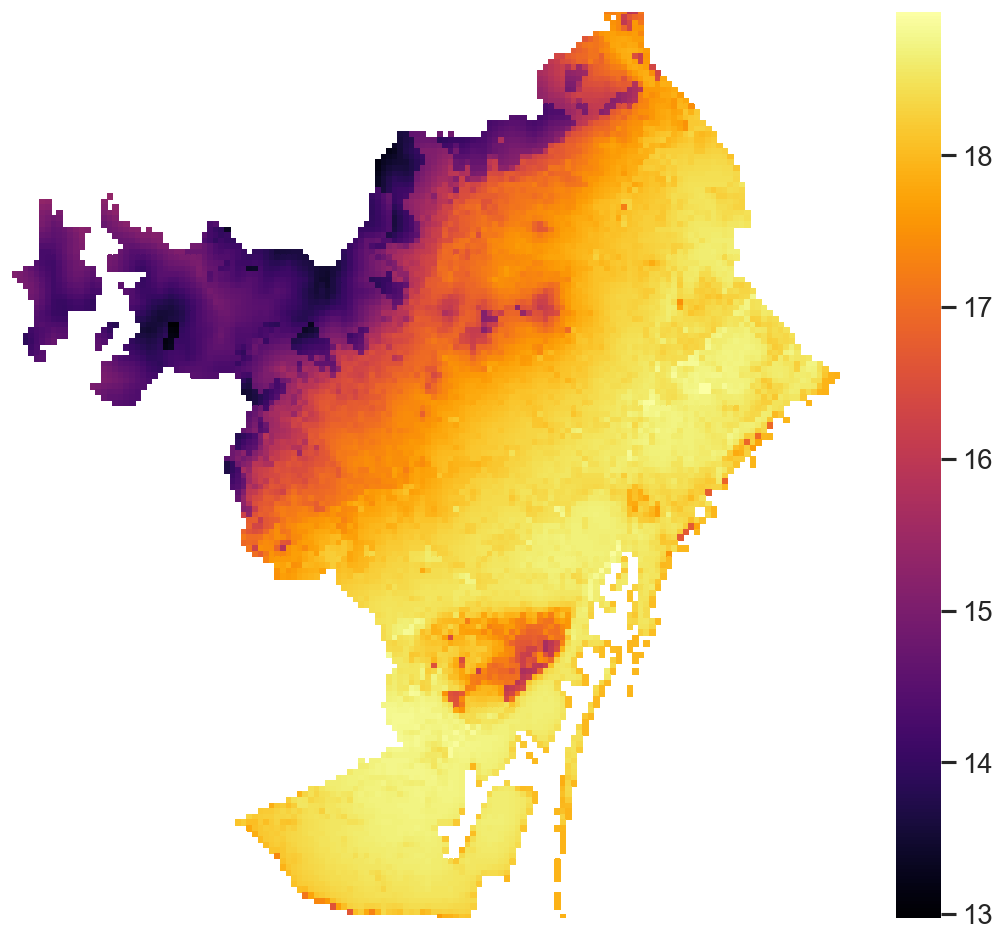

In [249]:
plt.figure(figsize=(12,10), dpi=120)
sns.heatmap(t_mean_arrays.mean(axis=0)[::-1], cmap='inferno', square=True)
plt.axis('off')


In [202]:
df.head()

field_1             X             Y  green_cove  green_co_1  green_co_2  \
0        0  3.655359e+06  2.070910e+06        5297      726516  137.156126   
1        1  3.655450e+06  2.070801e+06        5945      849799  142.943482   
2        2  3.655459e+06  2.070900e+06        3737      511437  136.857640   
3        3  3.655456e+06  2.069699e+06        6501      922808  141.948623   
4        4  3.655464e+06  2.069798e+06        8129     1162246  142.975274   

   green_co_3  landuse_majority  elevation_mean  elevation_range  \
0       141.0             312.0      199.254802        59.430008   
1       147.0             311.0      199.392714        62.229996   
2       139.0             312.0      221.252228        52.389999   
3       144.0             311.0      409.811718        63.619995   
4       146.0             311.0      384.606403        53.549988   

   elevation_majority  slope_mean  orientation_mean   nx   ny        LAT  \
0          190.740005   20.960422        224.190428  186  227  41.424183   
1          194.850006   22.828920        145.431366  187  226  41.423294   
2          221.179993   20.978525        245.407737  187  227  41.424194   
3          387.880005   23.704270        198.288128  188  215  41.413395   
4          376.790009   21.304633         77.051443  188  216  41.414295   

        LON  
0  2.052902  
1  2.054112  
2  2.054099  
3  2.055452  
4  2.055439

In [211]:
df.pivot_table(index='ny', columns='nx', values='elevation_mean').values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

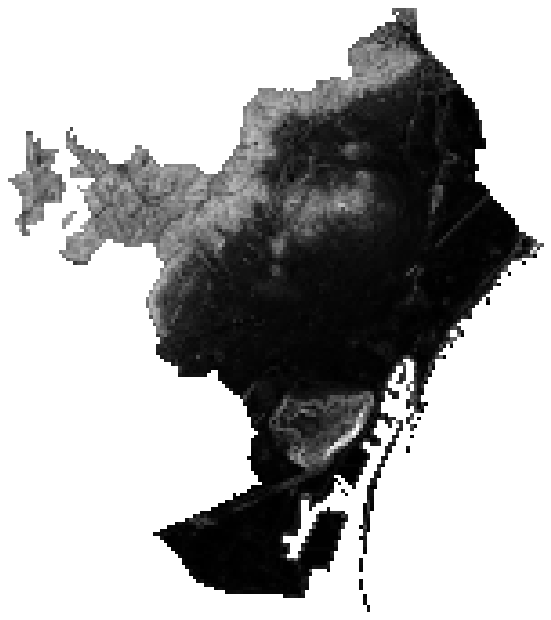

In [243]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(df.pivot_table(index='ny', columns='nx', values='elevation_mean').values[::-1], cmap=shiftedColorMap(plt.cm.terrain, start))
sns.despine(left=False, bottom=False)
plt.axis('off')
#plt.savefig('black_white.png', transparent=True)

In [216]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [255]:
temps_estacions = {}
for station in official.ESTACIO.unique():
    temps_estacions[station] = official.loc[official['ESTACIO'] == station, 'Tm']

In [257]:
temps_estacions

{'Barcelona - Zona Universitària': 0       12.7
 3       12.5
 6        9.9
 9       10.3
 12      11.7
         ... 
 4368    11.1
 4371    12.5
 4374    13.7
 4377    12.5
 4380    11.7
 Name: Tm, Length: 1461, dtype: float64, 'Barcelona - Zoo': 1       11.7
 4       12.7
 7       10.5
 10      11.2
 13      12.1
         ... 
 4369    10.8
 4372    12.4
 4375    13.9
 4378    12.4
 4381    12.4
 Name: Tm, Length: 1461, dtype: float64, 'Barcelona - el Raval': 2       14.1
 5       14.1
 8       11.9
 11      12.3
 14      13.2
         ... 
 4370    12.7
 4373    14.0
 4376    15.3
 4379    14.4
 4382    13.8
 Name: Tm, Length: 1461, dtype: float64}